[*********************100%***********************]  2 of 2 completed

Fetching market data...


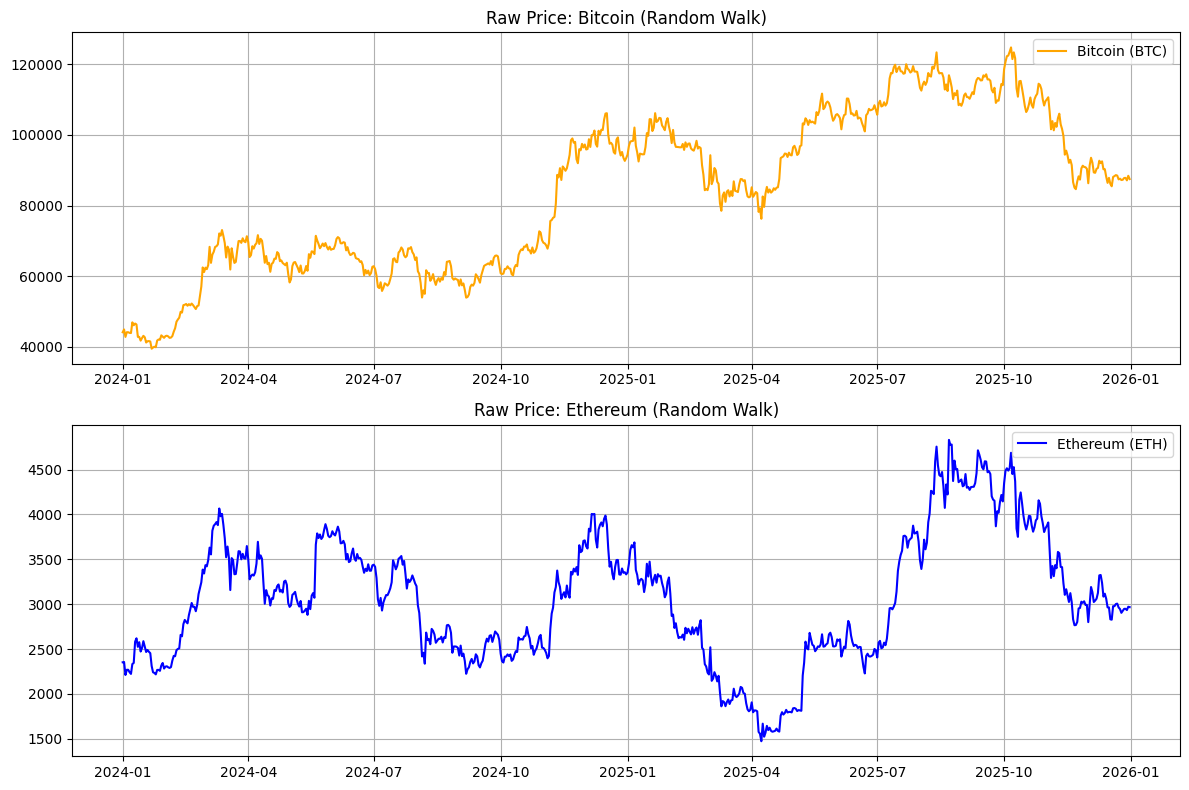

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

print("Fetching market data...")
tickers = ['BTC-USD', 'ETH-USD']
data = yf.download(tickers, start='2024-01-01', end='2026-01-01')['Close']

data = data.dropna()

data.columns = ['BTC', 'ETH']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

axes[0].plot(data.index, data['BTC'], color='orange', label='Bitcoin (BTC)')
axes[0].set_title('Raw Price: Bitcoin (Random Walk)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(data.index, data['ETH'], color='blue', label='Ethereum (ETH)')
axes[1].set_title('Raw Price: Ethereum (Random Walk)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

Calculating the Hedge Ratio (Beta)...
Optimal Hedge Ratio (Beta): 12.6416
Equation: 1 BTC = 12.6416 ETH



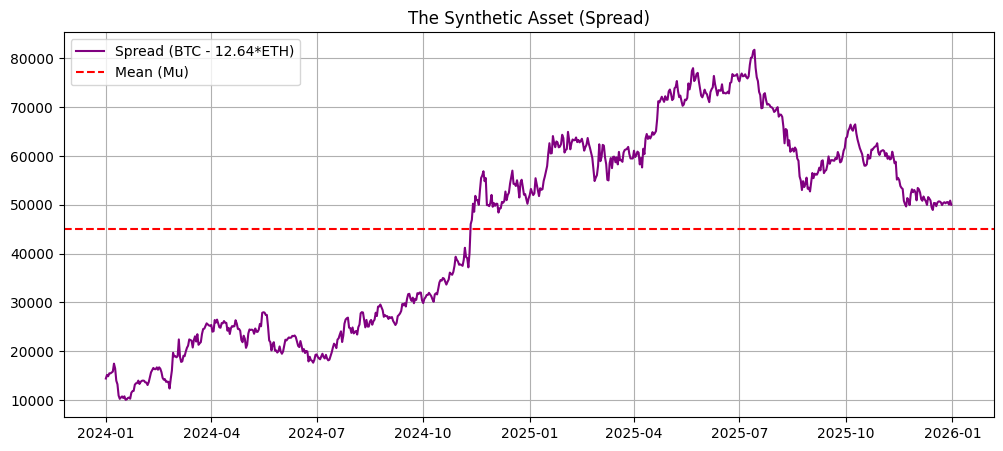

Running the Augmented Dickey-Fuller Test for a Unit Root...
ADF Test Statistic: -1.4990
P-Value: 0.5340

❌ RESULT: P-Value > 0.05. We cannot reject the Null Hypothesis.
The spread contains a Unit Root (it is a Random Walk). DO NOT TRADE.


In [4]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

print("Calculating the Hedge Ratio (Beta)...")

# 1. Ordinary Least Squares (OLS) Regression
# We are solving for Beta in the equation: BTC = Beta * ETH + Intercept
X = sm.add_constant(data['ETH']) # Add intercept for the math to hold
Y = data['BTC']
ols_model = sm.OLS(Y, X).fit()
beta = ols_model.params['ETH']

print(f"Optimal Hedge Ratio (Beta): {beta:.4f}")
print(f"Equation: 1 BTC = {beta:.4f} ETH\n")

# 2. Calculate the Spread (The "Rubber Band")
# Spread_t = BTC_t - Beta * ETH_t
spread = Y - beta * data['ETH']

# 3. Plot the Spread to visually check for weak stationarity
plt.figure(figsize=(12, 5))
plt.plot(spread.index, spread, color='purple', label=f'Spread (BTC - {beta:.2f}*ETH)')
plt.axhline(spread.mean(), color='red', linestyle='--', label='Mean (Mu)')
plt.title('The Synthetic Asset (Spread)')
plt.legend()
plt.grid(True)
plt.show()

# 4. The Augmented Dickey-Fuller (ADF) Test
print("Running the Augmented Dickey-Fuller Test for a Unit Root...")
adf_result = adfuller(spread)

print(f"ADF Test Statistic: {adf_result[0]:.4f}")
print(f"P-Value: {adf_result[1]:.4f}")

# The Matfyz Check
if adf_result[1] < 0.05:
    print("\n✅ RESULT: P-Value < 0.05. We reject the Null Hypothesis.")
    print("The spread is STATIONARY. We have found a tradable Ornstein-Uhlenbeck process!")
else:
    print("\n❌ RESULT: P-Value > 0.05. We cannot reject the Null Hypothesis.")
    print("The spread contains a Unit Root (it is a Random Walk). DO NOT TRADE.")